In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

num_points = 1000
num_steps = 8 # number of training steps

#### y = W * x + b , for W = 0.1, b = 0.3

In [44]:
def getDataSet(num_points) :
    vectors_set = []
    W = 0.1
    b = 0.3
    
    for i in range(num_points) :
        x1 = np.random.normal(0.0, 0.55)
        y1 = x1 * W + b + np.random.normal(0.0, 0.03)
        vectors_set.append([x1, y1])
    
    x_data = [ v[0] for v in vectors_set ]
    y_data = [ v[1] for v in vectors_set ]
    
    return x_data, y_data

In [17]:
# getDataSet(30)

In [72]:
def plotData(x_data, y_data, y) :
    plt.plot(x_data, y_data, 'ro')
    plt.plot(x_data, y)
    
    plt.xlabel('x')
    plt.xlim(-2, 2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    
    plt.legend()
    plt.show()

In [70]:
# x_data, y_data = getDataSet(num_points)
# plotData(x_data, y_data, y=....)

#### Gradient Descent

0 [-0.37029994] [ 0.2980485] 0.0664485


/home/dkajej/anaconda2/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


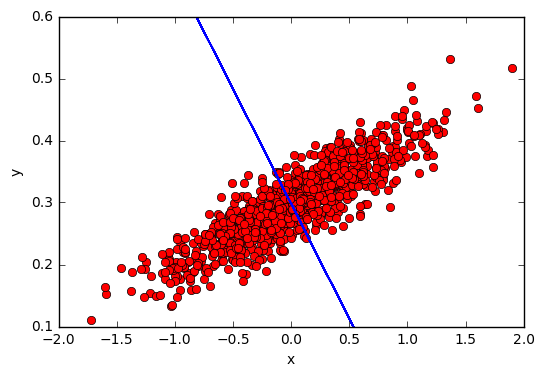

1 [-0.23103443] [ 0.29801381] 0.0333951


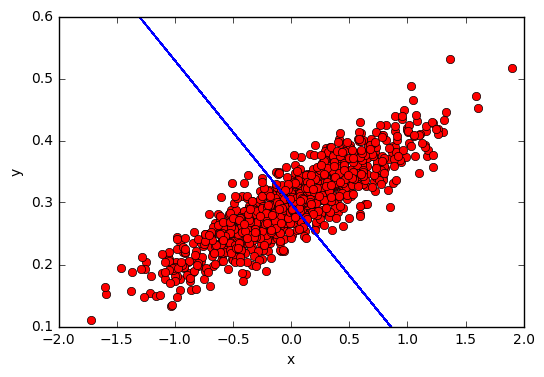

2 [-0.13295889] [ 0.29798937] 0.0170024


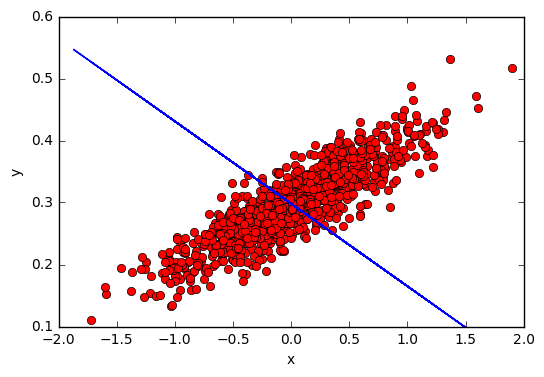

3 [-0.06389074] [ 0.29797217] 0.0088725


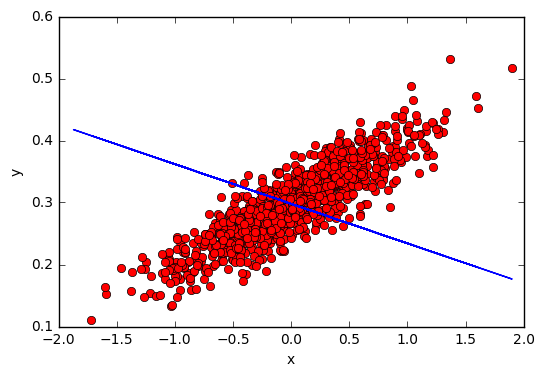

4 [-0.01525062] [ 0.29796004] 0.00484052


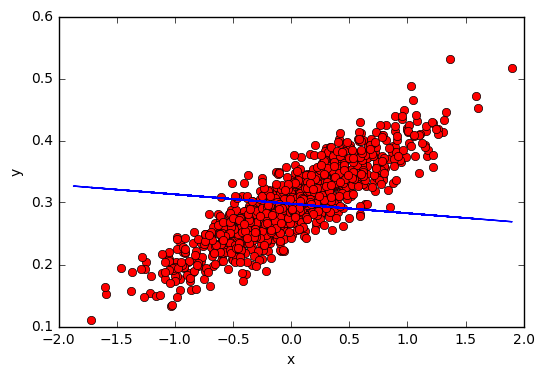

5 [ 0.01900342] [ 0.29795152] 0.00284087


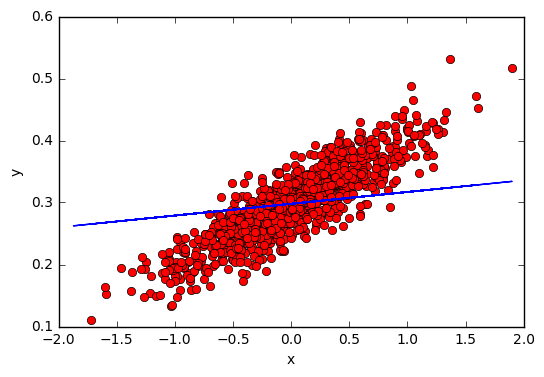

6 [ 0.04312628] [ 0.2979455] 0.00184916


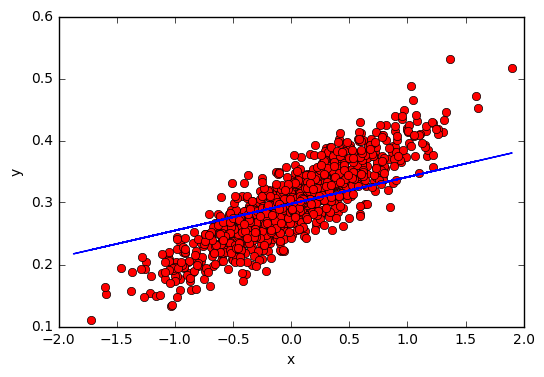

7 [ 0.06011441] [ 0.29794127] 0.00135732


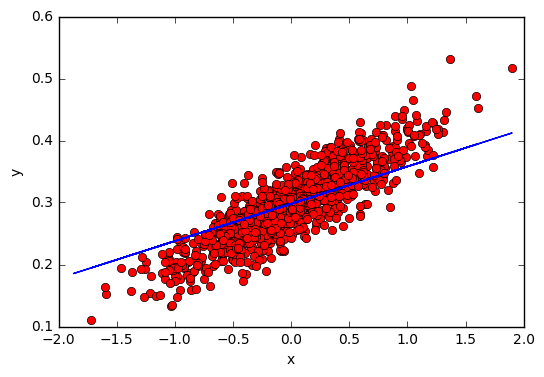

8 [ 0.07207804] [ 0.29793829] 0.0011134


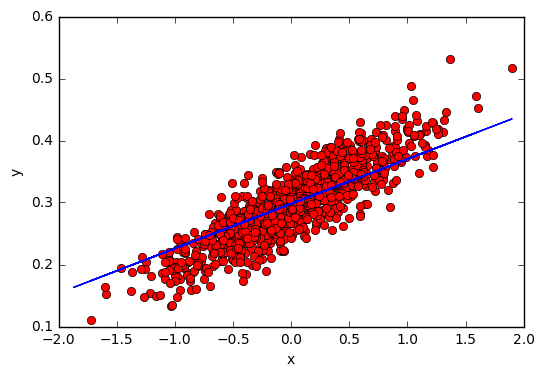

9 [ 0.08050323] [ 0.29793617] 0.000992422


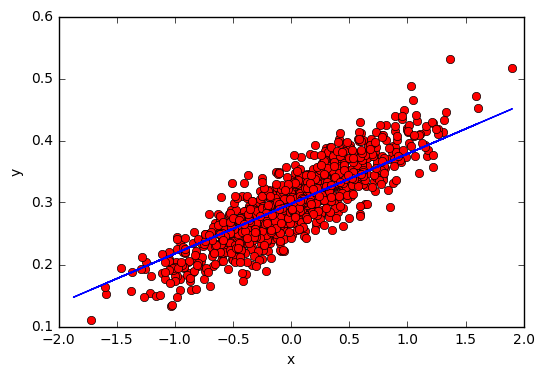

10 [ 0.08643654] [ 0.29793471] 0.000932426


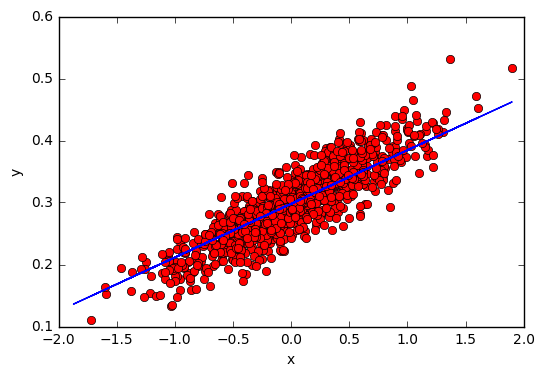

11 [ 0.09061497] [ 0.29793367] 0.000902671


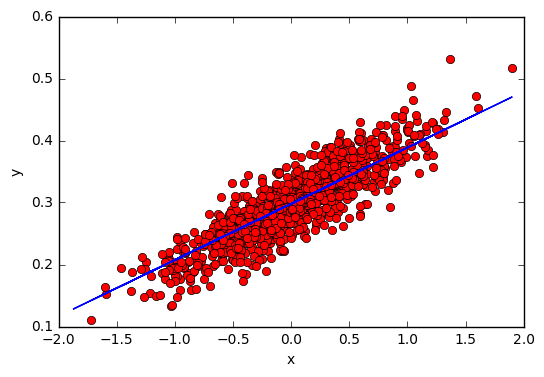

12 [ 0.09355757] [ 0.29793292] 0.000887914


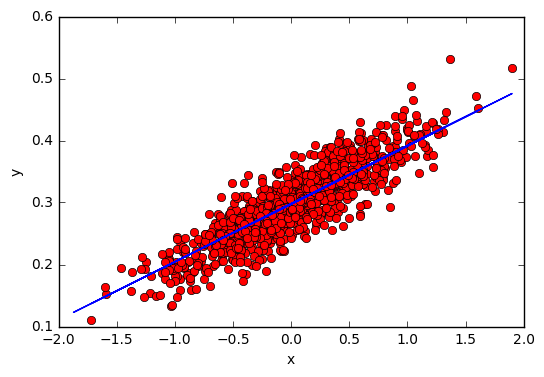

13 [ 0.09562985] [ 0.29793242] 0.000880596


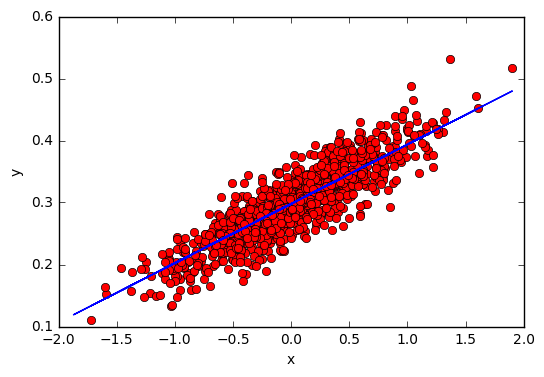

14 [ 0.09708922] [ 0.29793206] 0.000876966


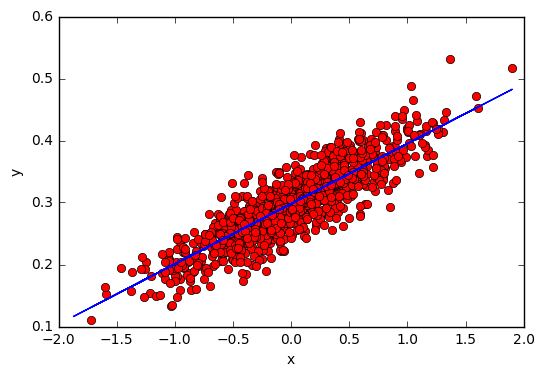

15 [ 0.09811696] [ 0.29793179] 0.000875166


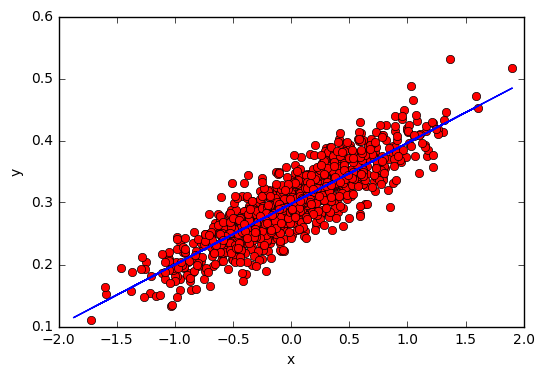

16 [ 0.09884072] [ 0.29793161] 0.000874273


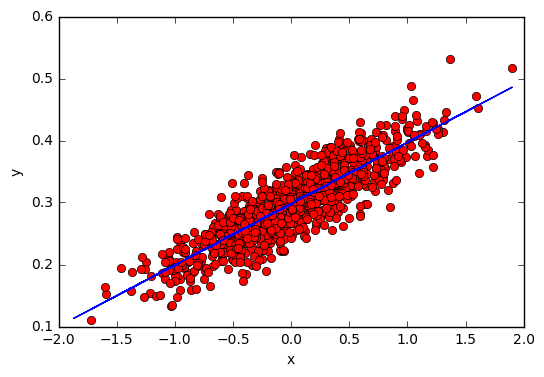

17 [ 0.09935042] [ 0.29793149] 0.00087383


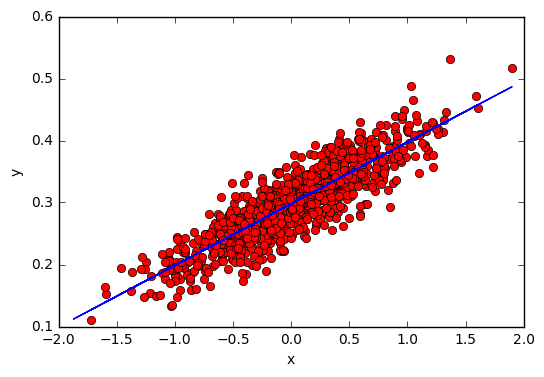

18 [ 0.09970938] [ 0.2979314] 0.000873611


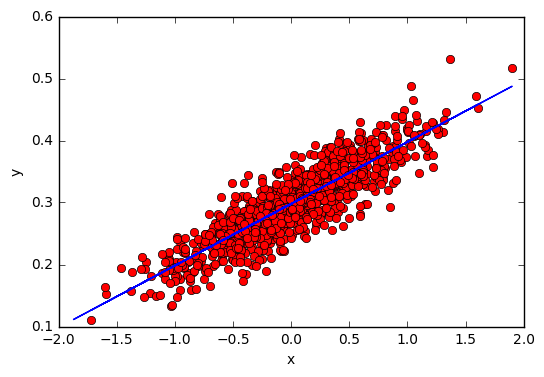

19 [ 0.09996216] [ 0.29793134] 0.000873502


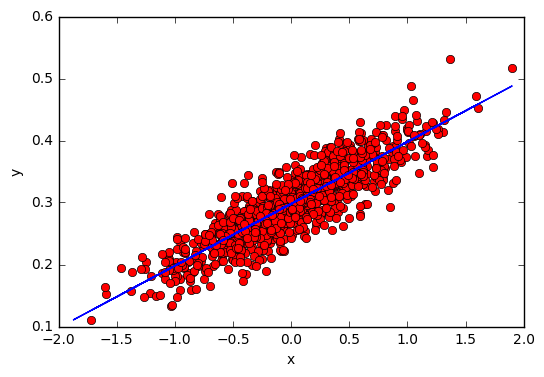

In [86]:
def gd(num_steps = 8, alpha = 0.0001) :
    x_data, y_data = getDataSet(num_points)
    
    
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) # shape (1,) and 
    b = tf.Variable(tf.zeros([1]))
    
    # parameter optimize
    # W = tf.Variable([-0.0484]) # shape (1,) and 
    # b = tf.Variable([0.297])
    
    y = W * x_data + b # predicted output
    
    loss = tf.reduce_mean(tf.square(y - y_data)) # sum of squared error --> reduce to mean 
    # loss = tf.sqrt(loss) # MSE -> RMSE, not so much good...
    optimizer = tf.train.GradientDescentOptimizer(0.5) 
    train = optimizer.minimize(loss) # minimize MSE with gradient descent algorithm
    ## tensorflow grpah is structured
    
    ## actual running calculation based on graph
    init = tf.initialize_all_variables() # init W, b
    
    sess = tf.Session()
    sess.run(init) # init is executed here!!!!
    
    for step in range(num_steps) :
        sess.run(train)
        print (step, sess.run(W), sess.run(b), sess.run(loss))
        
        plotData(x_data, y_data, sess.run(W) * x_data + sess.run(b))
        

gd(num_steps = 20)